#Linear Regression

For this task, we used a dataset from a school to build a linear regression to predict values. The dataset was taken from http://www.kaggle.com.


We want to find the relationship between features and grade type by performing a regression, training with 80% of the records and evaluating with 20% of the records.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


# upload file
df = pd.read_csv('/content/student2.csv')

# See the first rows
df.head()

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Reading,Notes,Listening_in_Class,Project_work,Attendance,Grade
0,10001,24,Female,State,75%,Yes,Yes,Bike,7,Yes,Yes,Yes,Yes,Always,CC
1,10002,21,Female,State,0%,Yes,Yes,Bus,9,Yes,Yes,Yes,No,Always,CC
2,10003,22,Female,Private,0%,No,Yes,Private,6,Yes,No,Yes,Yes,Always,FF
3,10004,24,Female,Private,50%,Yes,No,Bus,11,Yes,No,Yes,Yes,Always,CC
4,10005,20,Male,State,25%,No,Yes,Bus,9,Yes,Yes,Yes,Yes,Always,CC


In [ ]:
# Overview

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  5000 non-null   int64 
 1   Student_Age         5000 non-null   int64 
 2   Sex                 5000 non-null   object
 3   High_School_Type    5000 non-null   object
 4   Scholarship         5000 non-null   object
 5   Additional_Work     5000 non-null   object
 6   Sports_activity     5000 non-null   object
 7   Transportation      5000 non-null   object
 8   Weekly_Study_Hours  5000 non-null   int64 
 9   Reading             5000 non-null   object
 10  Notes               5000 non-null   object
 11  Listening_in_Class  5000 non-null   object
 12  Project_work        5000 non-null   object
 13  Attendance          5000 non-null   object
 14  Grade               5000 non-null   object
dtypes: int64(3), object(12)
memory usage: 586.1+ KB
None


In [ ]:
# Null values
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [ ]:
df_clean = df.dropna()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  5000 non-null   int64 
 1   Student_Age         5000 non-null   int64 
 2   Sex                 5000 non-null   object
 3   High_School_Type    5000 non-null   object
 4   Scholarship         5000 non-null   object
 5   Additional_Work     5000 non-null   object
 6   Sports_activity     5000 non-null   object
 7   Transportation      5000 non-null   object
 8   Weekly_Study_Hours  5000 non-null   int64 
 9   Reading             5000 non-null   object
 10  Notes               5000 non-null   object
 11  Listening_in_Class  5000 non-null   object
 12  Project_work        5000 non-null   object
 13  Attendance          5000 non-null   object
 14  Grade               5000 non-null   object
dtypes: int64(3), object(12)
memory usage: 586.1+ KB
None


In [ ]:
# Change the column 'Grade'

grade_mapping = {
    'AA': 10,
    'BA': 9,
    'BB': 8,
    'CC': 6,
    'DC': 5,
    'FF': 3
}

df_clean['Grade'] = df_clean['Grade'].replace(grade_mapping)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  5000 non-null   int64 
 1   Student_Age         5000 non-null   int64 
 2   Sex                 5000 non-null   object
 3   High_School_Type    5000 non-null   object
 4   Scholarship         5000 non-null   object
 5   Additional_Work     5000 non-null   object
 6   Sports_activity     5000 non-null   object
 7   Transportation      5000 non-null   object
 8   Weekly_Study_Hours  5000 non-null   int64 
 9   Reading             5000 non-null   object
 10  Notes               5000 non-null   object
 11  Listening_in_Class  5000 non-null   object
 12  Project_work        5000 non-null   object
 13  Attendance          5000 non-null   object
 14  Grade               5000 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 586.1+ KB
None


/tmp/ipython-input-31-671615724.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Grade'] = df_clean['Grade'].replace(grade_mapping)


In [ ]:
# Convert categorical variables to numerical using get_dummies
df_encoded = pd.get_dummies(df_clean, drop_first=False)
df_encoded.head()
print(df_encoded.columns)
df_encoded.head()


Index(['Id', 'Student_Age', 'Weekly_Study_Hours', 'Grade', 'Sex_Female',
       'Sex_Male', 'High_School_Type_Other', 'High_School_Type_Private',
       'High_School_Type_State', 'Scholarship_0%', 'Scholarship_100%',
       'Scholarship_25%', 'Scholarship_50%', 'Scholarship_75%',
       'Additional_Work_No', 'Additional_Work_Yes', 'Sports_activity_No',
       'Sports_activity_Yes', 'Transportation_Bike', 'Transportation_Bus',
       'Transportation_Private', 'Reading_No', 'Reading_Yes', 'Notes_No',
       'Notes_Yes', 'Listening_in_Class_No', 'Listening_in_Class_Yes',
       'Project_work_No', 'Project_work_Yes', 'Attendance_Always',
       'Attendance_Never', 'Attendance_Sometimes'],
      dtype='object')


,Id,Student_Age,Weekly_Study_Hours,Grade,Sex_Female,Sex_Male,High_School_Type_Other,High_School_Type_Private,High_School_Type_State,Scholarship_0%,...,Reading_Yes,Notes_No,Notes_Yes,Listening_in_Class_No,Listening_in_Class_Yes,Project_work_No,Project_work_Yes,Attendance_Always,Attendance_Never,Attendance_Sometimes
0,10001,24,7,6,True,False,False,False,True,False,...,True,False,True,False,True,False,True,True,False,False
1,10002,21,9,6,True,False,False,False,True,True,...,True,False,True,False,True,True,False,True,False,False
2,10003,22,6,3,True,False,False,True,False,True,...,True,True,False,False,True,False,True,True,False,False
3,10004,24,11,6,True,False,False,True,False,False,...,True,True,False,False,True,False,True,True,False,False
4,10005,20,9,6,False,True,False,False,True,False,...,True,False,True,False,True,False,True,True,False,False


In [ ]:
# Correlation analysis
correlation_matrix = df_encoded.corr(numeric_only=True)
correlation_with_target = correlation_matrix['Grade'].sort_values(ascending=False)
print("Correlations with Grade:")
print(correlation_with_target)


Correlations with Grade:
Grade                       1.000000
Weekly_Study_Hours          0.726586
Reading_Yes                 0.235408
Listening_in_Class_Yes      0.234600
Notes_Yes                   0.158384
Attendance_Always           0.141836
Sports_activity_No          0.029734
High_School_Type_Other      0.019625
Project_work_Yes            0.018261
Student_Age                 0.015746
Sex_Female                  0.008953
Scholarship_75%             0.008044
Additional_Work_No          0.004839
Scholarship_100%            0.004197
Scholarship_50%             0.003298
Scholarship_0%              0.001345
High_School_Type_State      0.000961
Transportation_Bus          0.000804
Transportation_Bike         0.000679
Transportation_Private     -0.001292
Additional_Work_Yes        -0.004839
Id                         -0.005821
Sex_Male                   -0.008953
High_School_Type_Private   -0.012817
Scholarship_25%            -0.014448
Project_work_No            -0.018261
Sports_activi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (X) and target (y)
X = df_encoded.drop(['Grade'], axis=1)
y = df_encoded['Grade']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.6662
RMSE: 0.9159


In [ ]:
# These results establish that the prediction has a margin of error of 0.92 units (in a scale from 1 to 10).
# The model explains 66.6% of the variance (significant correlation)

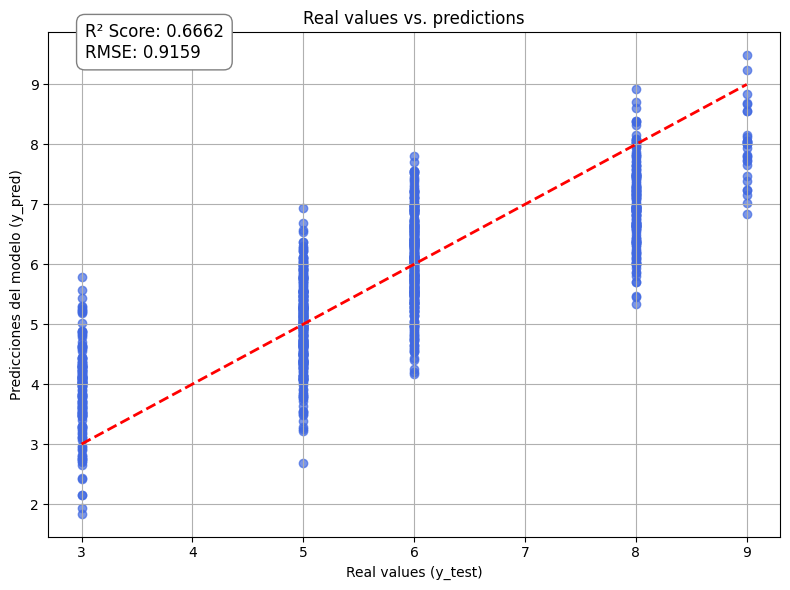

In [ ]:
# Plot real values vs predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Real values (y_test)")
plt.ylabel("Predicciones del modelo (y_pred)")
plt.title("Real values vs. predictions")

# Display metrics on the chart
plt.text(
    0.05, 0.95,
    f"R² Score: {r2:.4f}\nRMSE: {rmse:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.grid(True)
plt.tight_layout()
plt.show()
